<a href="https://colab.research.google.com/github/lerdeljan17/Bioinformatics-Project2/blob/main/Projekat2_bioinfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pysam
!pip install matplotlib

     |████████████████████████████████| 10.8MB 2.8MB/s 


In [ ]:
!gunzip /content/drive/My\ Drive/Bioinformatika/Projekat2/Copy\ of\ sample_11.chrom11.exome.pe1.fq.gz
!gunzip /content/drive/My\ Drive/Bioinformatika/Projekat2/Copy\ of\ sample_11.chrom11.exome.pe2.fq.gz
!gunzip /content/drive/My\ Drive/Bioinformatika/Projekat2/Homo_sapiens_assembly38.fasta.gz

gzip: /content/drive/My Drive/Bioinformatika/Projekat2/Copy of sample_11.chrom11.exome.pe1.fq.gz: No such file or directory
gzip: /content/drive/My Drive/Bioinformatika/Projekat2/Copy of sample_11.chrom11.exome.pe2.fq.gz: No such file or directory
gzip: /content/drive/My Drive/Bioinformatika/Projekat2/Homo_sapiens_assembly38.fasta.gz: No such file or directory


# **1**

[report prvog fajla](https://drive.google.com/open?id=1a_hjIi9jhshsluAtpPHM9HIz0tsOsONW)

[report drugog fajla](https://drive.google.com/open?id=1RxGa7jcfCoEQGy28bBUz4pKVxItkXDcv)

FastQC je u oba fajla kao problematično označio Per base sequence quality. Ovaj kriterijum označava prosečan  kvalitet svake baze u svakom ridu u fajlu. Meri kvalitet identifikacije baza u ridovima u fajlovima.

# **2**

In [ ]:
### samtools
!apt-get install samtools

### pysam
!pip install pysam

### picard
!wget https://github.com/broadinstitute/picard/releases/download/2.21.6/picard.jar

### GATK
!wget -O gatk-4.1.4.1.zip "https://github.com/broadinstitute/gatk/releases/download/4.1.4.1/gatk-4.1.4.1.zip"
!unzip gatk-4.1.4.1.zip
!R -e 'install.packages(c("gplots", "gsalib"))'

!git clone https://github.com/lh3/bwa.git
!cd bwa && make

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cwltool libc-ares2 libhts2 libhttp-parser2.7.1 libjs-bootstrap nodejs
  nodejs-doc python-asn1crypto python-avro python-cachecontrol python-certifi
  python-cffi-backend python-chardet python-cryptography python-enum34
  python-html5lib python-idna python-ipaddress python-isodate python-lockfile
  python-mistune python-openssl python-pkg-resources python-pyparsing
  python-rdflib python-rdflib-jsonld python-requests python-ruamel.yaml
  python-schema-salad python-shellescape python-six python-sparqlwrapper
  python-typing python-urllib3 python-webencodings
Suggested packages:
  python-cryptography-doc python-cryptography-vectors python-enum34-doc
  python-genshi python-lxml python-lockfile-doc python-openssl-doc
  python-openssl-dbg python-setuptools python-pyparsing-doc python-rdflib-doc
  python-rdflib-tools python-socks python-ntlm
Th

In [ ]:
pe1 = '/content/drive/My\ Drive/Bioinformatika/Projekat2/Copy\ of\ sample_11.chrom11.exome.pe1.fq'
pe2 = '/content/drive/My\ Drive/Bioinformatika/Projekat2/Copy\ of\ sample_11.chrom11.exome.pe2.fq'
ref = '/content/drive/My\ Drive/Bioinformatika/Projekat2/Homo_sapiens_assembly38.fasta'
!bwa/bwa index /content/drive/My\ Drive/Bioinformatika/Projekat2/Homo_sapiens_assembly38.fasta
!./bwa/bwa mem -M -R '@RG\tID:1\tPL:Illumina\tSM:HG00096' -o HG00096.chr11.exome.sam {ref} {pe1} {pe2} 
!samtools view -b HG00096.chr11.exome.sam > HG00096.chr11.exome.bam
!samtools sort HG00096.chr11.exome.bam > HG00096.chr11.exome.sorted.bam

[bwa_index] Pack FASTA... tcmalloc: large alloc 1073741824 bytes == 0x5636365d4000 @  0x7fbb69e872a4 0x5635e5302f0b 0x5635e52eb6e9 0x5635e5306dc0 0x5635e53074af 0x5635e52c7047 0x7fbb690a1b97 0x5635e52c717a
tcmalloc: large alloc 1608679424 bytes == 0x563676638000 @  0x7fbb69e872a4 0x5635e5302f0b 0x5635e52eb9e4 0x5635e5306dc0 0x5635e53074af 0x5635e52c7047 0x7fbb690a1b97 0x5635e52c717a
34.57 sec
[bwa_index] Construct BWT for the packed sequence...
[BWTIncCreate] textLength=6434693834, availableWord=464768632
tcmalloc: large alloc 1859076096 bytes == 0x5635e660c000 @  0x7fbb69e88001 0x5635e5302e2c 0x5635e5303c0b 0x5635e5305451 0x5635e5305804 0x5635e53072c4 0x5635e53074af 0x5635e52c7047 0x7fbb690a1b97 0x5635e52c717a
[BWTIncConstructFromPacked] 10 iterations done. 99999994 characters processed.
[BWTIncConstructFromPacked] 20 iterations done. 199999994 characters processed.
[BWTIncConstructFromPacked] 30 iterations done. 299999994 characters processed.
[BWTIncConstructFromPacked] 40 iteration

In [ ]:
!samtools index HG00096.chr11.exome.sorted.bam

In [ ]:
import pysam    
samfile = pysam.AlignmentFile("/content/drive/My Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.sorted.bam", "rb") 
#print(samfile.nreferences)
#print(samfile.references)
print(sum(1 for read in samfile if not read.is_unmapped))
#print(sum(1 for read in samfile if  read.is_unmapped))

2110816


In [ ]:
#print(sum(1 for read in samfile.fetch() if not read.mate_is_unmapped))
print(sum(1 for read in samfile.fetch() if read.is_paired and not read.mate_is_unmapped and not read.is_duplicate))

2110795


In [ ]:
!samtools view -c -F 260 /content/drive/My\ Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.sorted.bam

2109502


(array([3.9500e+02, 5.1500e+02, 5.8400e+02, 7.5400e+02, 9.1900e+02,
        1.0670e+03, 1.2730e+03, 1.5180e+03, 1.9080e+03, 2.2140e+03,
        2.6350e+03, 3.1230e+03, 3.7850e+03, 4.4540e+03, 5.2860e+03,
        6.3520e+03, 7.4710e+03, 8.7270e+03, 1.0633e+04, 1.2447e+04,
        1.4658e+04, 1.7438e+04, 2.0258e+04, 2.4051e+04, 2.8083e+04,
        3.2346e+04, 3.8035e+04, 4.3977e+04, 5.0249e+04, 5.7041e+04,
        6.3933e+04, 7.1538e+04, 7.7772e+04, 8.1712e+04, 8.3994e+04,
        8.0024e+04, 6.9789e+04, 5.4291e+04, 3.5611e+04, 1.9287e+04,
        8.2200e+03, 6.0000e+02, 7.5000e+01, 1.3000e+01, 8.0000e+00,
        7.0000e+00, 3.0000e+00, 1.7500e+02, 6.1700e+02, 8.0000e+00,
        9.3940e+03, 3.9200e+02, 4.0000e+02, 4.0000e+00, 5.0000e+00,
        7.0000e+00, 1.3000e+01, 5.8000e+01, 4.3200e+02, 7.1210e+03,
        1.7955e+04, 3.4026e+04, 5.2155e+04, 6.8576e+04, 7.9294e+04,
        8.3944e+04, 8.2023e+04, 7.8317e+04, 7.2106e+04, 6.4918e+04,
        5.7443e+04, 5.1045e+04, 4.4546e+04, 3.86

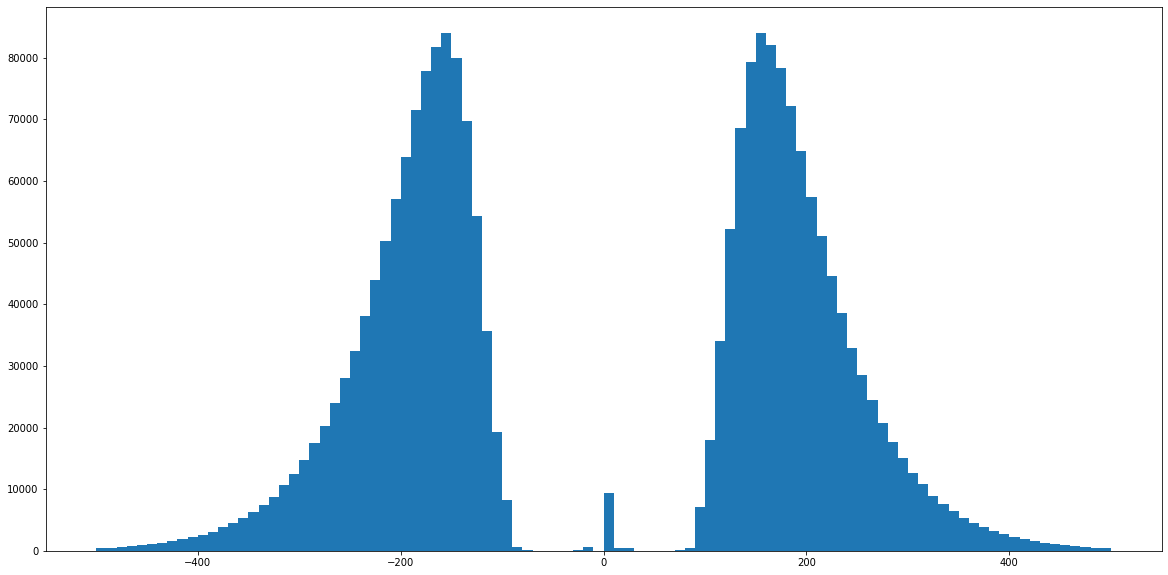

In [ ]:
import matplotlib.pyplot as plt
n = [read.template_length for read in samfile.fetch()]
plt.rcParams["figure.figsize"] = (20,10)
#print(n[:10])
#plt.hist(n)
plt.hist(n,range=(-500,500),bins=100)

In [ ]:
!tail /content/drive/My\ Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.sam 

SRR11573519.2832692	77	*	0	0	*	*	0	0	TTCACGCCGTCCTCTATCAAAACTGCATACACACGATTCTTTTTGAGATTAGGTTTTTGATGATGGCGAATCTCAGCCTTAATCTGGTAGAAATGGAGTAA	AAFFFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJFJJ	AS:i:0	XS:i:0	RG:Z:1
SRR11573519.2832692	141	*	0	0	*	*	0	0	ATGGTGACTTGGTGGTAGAAGAGTTGCTCAAGATTTTGCAGGTGCGGCCATGAGTTTTACAGTACAAGTAAAGGAAGAATTGCTGCTTCAGTCTAGCCAAA	AAFFAJJJJFJJJJJJJJJJJJJJJFJJJJJJJJJJJJJ<JJJJJJJJFFAJJJ7F<JJJAJFJJJJJJJJFJJJJFFJJJFJJJJJJJJJJJJJJJJJJJ	AS:i:0	XS:i:0	RG:Z:1
SRR11573519.2832706	77	*	0	0	*	*	0	0	GACTTGTAGCTGAAGAAACTCTTGTTTCTCCACTTTCAGGTGACGTTGTTGCCCTTGAAAATGTTAATGACCCAGTCTTCTCATCAGGAGCTATGGGTAAA	AAFFFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ	AS:i:0	XS:i:0	RG:Z:1
SRR11573519.2832706	141	*	0	0	*	*	0	0	ATCTTAGCTGCATCGAATTTAGCAATCGGAGTACCAGCTTTTACTTTATCACCTGCTGCTACTAATTTTTCAAATCCATTACCGTTCATTGATACAGTATC	AAFFFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ

# **3**

In [ ]:
ibam = '/content/drive/My\ Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.sorted.bam'
obam = '/content/drive/My\ Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.deduped.bam'

!java -jar picard.jar MarkDuplicates I={ibam} O={obam} M=dup_metrics.txt

!grep -A2 '## METRICS CLASS' dup_metrics.txt | grep -v '## METRICS CLASS' > report.tsv

INFO	2020-05-25 08:55:10	MarkDuplicates	

********** NOTE: Picard's command line syntax is changing.
**********
********** For more information, please see:
********** https://github.com/broadinstitute/picard/wiki/Command-Line-Syntax-Transition-For-Users-(Pre-Transition)
**********
********** The command line looks like this in the new syntax:
**********
**********    MarkDuplicates -I /content/drive/My Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.sorted.bam -O /content/drive/My Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.deduped.bam -M dup_metrics.txt
**********


08:55:11.593 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/picard.jar!/com/intel/gkl/native/libgkl_compression.so
[Mon May 25 08:55:11 UTC 2020] MarkDuplicates INPUT=[/content/drive/My Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.sorted.bam] OUTPUT=/content/drive/My Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.deduped.bam METRICS_FILE=dup_metrics.txt    MAX_SEQUENCE

In [ ]:
import pandas as pd
pd.read_csv('report.tsv', sep='\t')

,LIBRARY,UNPAIRED_READS_EXAMINED,READ_PAIRS_EXAMINED,SECONDARY_OR_SUPPLEMENTARY_RDS,UNMAPPED_READS,UNPAIRED_READ_DUPLICATES,READ_PAIR_DUPLICATES,READ_PAIR_OPTICAL_DUPLICATES,PERCENT_DUPLICATION,ESTIMATED_LIBRARY_SIZE
0,Unknown Library,3064,1053219,1314,567836,969,40239,0,0.03861,13430166


procenat duplikacije 0.03861

PCR 100%

Opticki duplikati 0%

In [ ]:
  #rekalibracija
  !gsutil cp gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.dbsnp138.vcf . 
  !gsutil cp gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.dbsnp138.vcf.idx .

  !gsutil cp gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta .
  !gsutil cp gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta.fai .
  !gsutil cp gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.dict .

Copying gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.dbsnp138.vcf...
-
Operation completed over 1 objects/10.2 GiB.                                     
Copying gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.dbsnp138.vcf.idx...
/ [1 files][ 11.9 MiB/ 11.9 MiB]                                                
Operation completed over 1 objects/11.9 MiB.                                     
Copying gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta...
|
Operation completed over 1 objects/3.0 GiB.                                      
Copying gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.fasta.fai...
/ [1 files][157.2 KiB/157.2 KiB]                                                
Operation completed over 1 objects/157.2 KiB.                                    
Copying gs://genomics-public-data/resources/broad/hg38/v0/Homo_sapiens_assembly38.dict...
/ [1 files][568.1 KiB/568.1 Ki

In [ ]:
ibam = '/content/drive/My\ Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.deduped.bam'
obam = '/content/drive/My\ Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.recalibrated.bam'
recal = '/content/drive/My\ Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.recal.table'

dbsnp = 'Homo_sapiens_assembly38.dbsnp138.vcf'
ref = 'Homo_sapiens_assembly38.fasta'

gatk = 'java -jar gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar'

In [ ]:
!{gatk} BaseRecalibrator -I {ibam} --known-sites {dbsnp} -O {recal} --reference {ref}

09:00:03.530 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar!/com/intel/gkl/native/libgkl_compression.so
09:00:09.419 INFO  BaseRecalibrator - ------------------------------------------------------------
09:00:09.419 INFO  BaseRecalibrator - The Genome Analysis Toolkit (GATK) v4.1.4.1
09:00:09.420 INFO  BaseRecalibrator - For support and documentation go to https://software.broadinstitute.org/gatk/
09:00:09.420 INFO  BaseRecalibrator - Executing as root@476d8d644beb on Linux v4.19.104+ amd64
09:00:09.420 INFO  BaseRecalibrator - Java runtime: OpenJDK 64-Bit Server VM v11.0.7+10-post-Ubuntu-2ubuntu218.04
09:00:09.421 INFO  BaseRecalibrator - Start Date/Time: May 25, 2020 at 9:00:03 AM UTC
09:00:09.421 INFO  BaseRecalibrator - ------------------------------------------------------------
09:00:09.421 INFO  BaseRecalibrator - ------------------------------------------------------------
09:00:09.422 INFO  BaseRecal

In [ ]:
!{gatk} ApplyBQSR -I {ibam} -bqsr {recal} -O {obam}

09:08:00.306 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar!/com/intel/gkl/native/libgkl_compression.so
09:08:06.018 INFO  ApplyBQSR - ------------------------------------------------------------
09:08:06.018 INFO  ApplyBQSR - The Genome Analysis Toolkit (GATK) v4.1.4.1
09:08:06.018 INFO  ApplyBQSR - For support and documentation go to https://software.broadinstitute.org/gatk/
09:08:06.019 INFO  ApplyBQSR - Executing as root@476d8d644beb on Linux v4.19.104+ amd64
09:08:06.019 INFO  ApplyBQSR - Java runtime: OpenJDK 64-Bit Server VM v11.0.7+10-post-Ubuntu-2ubuntu218.04
09:08:06.019 INFO  ApplyBQSR - Start Date/Time: May 25, 2020 at 9:08:00 AM UTC
09:08:06.019 INFO  ApplyBQSR - ------------------------------------------------------------
09:08:06.019 INFO  ApplyBQSR - ------------------------------------------------------------
09:08:06.020 INFO  ApplyBQSR - HTSJDK Version: 2.21.0
09:08:06.020 INFO  ApplyBQSR -

In [ ]:
post_recal = '/content/drive/My\ Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.post_recal.table'
!{gatk} BaseRecalibrator -I {obam} --known-sites {dbsnp} -O {post_recal} --reference {ref}

09:09:34.307 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar!/com/intel/gkl/native/libgkl_compression.so
09:09:40.101 INFO  BaseRecalibrator - ------------------------------------------------------------
09:09:40.103 INFO  BaseRecalibrator - The Genome Analysis Toolkit (GATK) v4.1.4.1
09:09:40.103 INFO  BaseRecalibrator - For support and documentation go to https://software.broadinstitute.org/gatk/
09:09:40.103 INFO  BaseRecalibrator - Executing as root@476d8d644beb on Linux v4.19.104+ amd64
09:09:40.103 INFO  BaseRecalibrator - Java runtime: OpenJDK 64-Bit Server VM v11.0.7+10-post-Ubuntu-2ubuntu218.04
09:09:40.104 INFO  BaseRecalibrator - Start Date/Time: May 25, 2020 at 9:09:34 AM UTC
09:09:40.104 INFO  BaseRecalibrator - ------------------------------------------------------------
09:09:40.104 INFO  BaseRecalibrator - ------------------------------------------------------------
09:09:40.105 INFO  BaseRecal

In [ ]:
!{gatk} AnalyzeCovariates -before {recal} -after {post_recal} -plots 'compare.pdf'

09:17:04.289 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar!/com/intel/gkl/native/libgkl_compression.so
09:17:10.014 INFO  AnalyzeCovariates - ------------------------------------------------------------
09:17:10.014 INFO  AnalyzeCovariates - The Genome Analysis Toolkit (GATK) v4.1.4.1
09:17:10.015 INFO  AnalyzeCovariates - For support and documentation go to https://software.broadinstitute.org/gatk/
09:17:10.015 INFO  AnalyzeCovariates - Executing as root@476d8d644beb on Linux v4.19.104+ amd64
09:17:10.015 INFO  AnalyzeCovariates - Java runtime: OpenJDK 64-Bit Server VM v11.0.7+10-post-Ubuntu-2ubuntu218.04
09:17:10.016 INFO  AnalyzeCovariates - Start Date/Time: May 25, 2020 at 9:17:04 AM UTC
09:17:10.016 INFO  AnalyzeCovariates - ------------------------------------------------------------
09:17:10.016 INFO  AnalyzeCovariates - ------------------------------------------------------------
09:17:10.017 INFO  A

# **4**

# haplotype caller

In [ ]:
gatk = 'java -jar gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar'
dbsnp = 'Homo_sapiens_assembly38.dbsnp138.vcf'
ref = 'Homo_sapiens_assembly38.fasta'

ibam = '/content/drive/My\ Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.recalibrated.bam'
ovcf = '/content/drive/My\ Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.vcf'

!{gatk} HaplotypeCaller --input {ibam} --output {ovcf} --reference {ref} --dbsnp {dbsnp} -L chr11

09:17:33.313 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar!/com/intel/gkl/native/libgkl_compression.so
09:17:39.010 INFO  HaplotypeCaller - ------------------------------------------------------------
09:17:39.011 INFO  HaplotypeCaller - The Genome Analysis Toolkit (GATK) v4.1.4.1
09:17:39.011 INFO  HaplotypeCaller - For support and documentation go to https://software.broadinstitute.org/gatk/
09:17:39.011 INFO  HaplotypeCaller - Executing as root@476d8d644beb on Linux v4.19.104+ amd64
09:17:39.011 INFO  HaplotypeCaller - Java runtime: OpenJDK 64-Bit Server VM v11.0.7+10-post-Ubuntu-2ubuntu218.04
09:17:39.012 INFO  HaplotypeCaller - Start Date/Time: May 25, 2020 at 9:17:33 AM UTC
09:17:39.012 INFO  HaplotypeCaller - ------------------------------------------------------------
09:17:39.012 INFO  HaplotypeCaller - ------------------------------------------------------------
09:17:39.013 INFO  HaplotypeCaller -

In [ ]:
import pysam

def is_snp(variant):
  return len(variant.ref) == 1 and len(variant.alts[0]) == 1

def is_transitions(variant):
  allels = set((variant.ref, variant.alts[0]))
  return allels == {'A', 'G'} or allels == {'C', 'T'}

In [ ]:
ti = sum(1 for v in pysam.VariantFile("/content/drive/My Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.vcf") \
         if is_snp(v)\
         and is_transitions(v))

tv = sum(1 for v in pysam.VariantFile("/content/drive/My Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.vcf") \
          if is_snp(v) \
          and not is_transitions(v))

print('Ti:', ti)
print('Tv:', tv)
print('Ti/Tv', ti/tv)

Ti: 5944
Tv: 2709
Ti/Tv 2.1941675895164265


# filtriranje

In [ ]:
gatk = 'java -jar gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar'

snp_f = "QD < 2.0 || FS > 60.0 || MQ < 40.0 || MQRankSum < -12.5 || ReadPosRankSum < -8.0"
indel_f = "QD < 2.0 || FS > 200.0 || ReadPosRankSum < -20.0" 

ref = 'Homo_sapiens_assembly38.fasta'

ivcf = '/content/drive/My\ Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.vcf'
isvcf = '/content/drive/My\ Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.snp.vcf'
iivcf = '/content/drive/My\ Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.indel.vcf'


osvcf = '/content/drive/My\ Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.snp.filtered.vcf'
oivcf = '/content/drive/My\ Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.indel.filtered.vcf'
ovcf = '/content/drive/My\ Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.filtered.vcf'

In [ ]:
!{gatk} SelectVariants -R {ref} -V {ivcf} -O {isvcf} --select-type-to-include SNP
!{gatk} VariantFiltration -R {ref} -V {isvcf} -O {osvcf} -filter "{snp_f}" --filter-name "snp"

!{gatk} SelectVariants -R {ref} -V {ivcf} -O {iivcf} --select-type-to-include INDEL
!{gatk} VariantFiltration -R {ref} -V {iivcf} -O {oivcf} -filter "{indel_f}" --filter-name "indel"

!{gatk} MergeVcfs -I {osvcf} -I {oivcf} -O {ovcf}

Streaming output truncated to the last 5000 lines.
09:39:49.107 WARN  JexlEngine - ![38,47]: 'QD < 2.0 || FS > 60.0 || MQ < 40.0 || MQRankSum < -12.5 || ReadPosRankSum < -8.0;' undefined variable MQRankSum
09:39:49.107 WARN  JexlEngine - ![38,47]: 'QD < 2.0 || FS > 60.0 || MQ < 40.0 || MQRankSum < -12.5 || ReadPosRankSum < -8.0;' undefined variable MQRankSum
09:39:49.107 WARN  JexlEngine - ![38,47]: 'QD < 2.0 || FS > 60.0 || MQ < 40.0 || MQRankSum < -12.5 || ReadPosRankSum < -8.0;' undefined variable MQRankSum
09:39:49.112 WARN  JexlEngine - ![38,47]: 'QD < 2.0 || FS > 60.0 || MQ < 40.0 || MQRankSum < -12.5 || ReadPosRankSum < -8.0;' undefined variable MQRankSum
09:39:49.113 WARN  JexlEngine - ![38,47]: 'QD < 2.0 || FS > 60.0 || MQ < 40.0 || MQRankSum < -12.5 || ReadPosRankSum < -8.0;' undefined variable MQRankSum
09:39:49.113 WARN  JexlEngine - ![38,47]: 'QD < 2.0 || FS > 60.0 || MQ < 40.0 || MQRankSum < -12.5 || ReadPosRankSum < -8.0;' undefined variable MQRankSum
09:39:49.113 WARN  

In [ ]:
def is_filtered(variant):
  return 'PASS' not in variant.filter

def is_snp(variant):
  return len(variant.ref) == 1 and len(variant.alts[0]) == 1

def is_transitions(variant):
  allels = set((variant.ref, variant.alts[0]))
  return allels == {'A', 'G'} or allels == {'C', 'T'}

In [ ]:
ovcf = '/content/drive/My Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.filtered.vcf'

print('SNPs:',
      sum(1 for v in pysam.VariantFile(ovcf) if is_filtered(v) and is_snp(v)))

print('INDELs:',
      sum(1 for v in pysam.VariantFile(ovcf) if is_filtered(v) and not is_snp(v)))
print ('Total mutations:',
      sum(1 for v in pysam.VariantFile(ovcf) if is_filtered(v) and not is_snp(v)) +  sum(1 for v in pysam.VariantFile(ovcf) if is_filtered(v) and is_snp(v)))
print('Num of mutations that pass filtration: ', sum(1 for v in pysam.VariantFile(ovcf) if is_filtered(v)))
print('Num of mutations that do not pass filtration: ', sum(1 for v in pysam.VariantFile(ovcf) if not is_filtered(v)))

SNPs: 156
INDELs: 3
Total mutations: 159
Num of mutations that pass filtration:  159
Num of mutations that do not pass filtration:  9228


In [ ]:
ti = sum(1 for v in pysam.VariantFile(ovcf) \
         if not is_filtered(v) \
         and is_snp(v)\
         and is_transitions(v))

tv = sum(1 for v in pysam.VariantFile(ovcf) \
          if not is_filtered(v) \
          and is_snp(v) \
          and not is_transitions(v))

print('Ti:', ti)
print('Tv:', tv)
print('Ti/Tv', ti/tv)

Ti: 5830
Tv: 2666
Ti/Tv 2.186796699174794


# **5**

# Funcotator

In [ ]:
!{gatk} FuncotatorDataSourceDownloader --germline --extract-after-download

11:03:15.407 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar!/com/intel/gkl/native/libgkl_compression.so
11:03:21.114 INFO  FuncotatorDataSourceDownloader - ------------------------------------------------------------
11:03:21.115 INFO  FuncotatorDataSourceDownloader - The Genome Analysis Toolkit (GATK) v4.1.4.1
11:03:21.115 INFO  FuncotatorDataSourceDownloader - For support and documentation go to https://software.broadinstitute.org/gatk/
11:03:21.116 INFO  FuncotatorDataSourceDownloader - Executing as root@476d8d644beb on Linux v4.19.104+ amd64
11:03:21.116 INFO  FuncotatorDataSourceDownloader - Java runtime: OpenJDK 64-Bit Server VM v11.0.7+10-post-Ubuntu-2ubuntu218.04
11:03:21.116 INFO  FuncotatorDataSourceDownloader - Start Date/Time: May 25, 2020 at 11:03:15 AM UTC
11:03:21.116 INFO  FuncotatorDataSourceDownloader - ------------------------------------------------------------
11:03:21.116 INFO  Funcotato

In [ ]:
ivcf = '/content/drive/My\ Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.filtered.vcf'
ovcf = '/content/drive/My\ Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.annotated.vcf'
func = 'funcotator_dataSources.v1.6.20190124g/'

!{gatk} Funcotator -O {ovcf} --ref-version hg38 -R {ref} -V {ivcf} --output-file-format VCF --data-sources-path {func}

11:05:07.173 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/content/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar!/com/intel/gkl/native/libgkl_compression.so
11:05:12.886 INFO  Funcotator - ------------------------------------------------------------
11:05:12.886 INFO  Funcotator - The Genome Analysis Toolkit (GATK) v4.1.4.1
11:05:12.886 INFO  Funcotator - For support and documentation go to https://software.broadinstitute.org/gatk/
11:05:12.887 INFO  Funcotator - Executing as root@476d8d644beb on Linux v4.19.104+ amd64
11:05:12.887 INFO  Funcotator - Java runtime: OpenJDK 64-Bit Server VM v11.0.7+10-post-Ubuntu-2ubuntu218.04
11:05:12.887 INFO  Funcotator - Start Date/Time: May 25, 2020 at 11:05:07 AM UTC
11:05:12.887 INFO  Funcotator - ------------------------------------------------------------
11:05:12.887 INFO  Funcotator - ------------------------------------------------------------
11:05:12.888 INFO  Funcotator - HTSJDK Version: 2.21.0
11:05:12.888 INFO  F

In [ ]:
import pysam

reader = pysam.VariantFile('/content/drive/My Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.annotated.vcf')
description = reader.header.info['FUNCOTATION'].description
functotations = description[73:].split('|')

Functional annotation from the Funcotator tool.  Funcotation fields are: Gencode_27_hugoSymbol|Gencode_27_ncbiBuild|Gencode_27_chromosome|Gencode_27_start|Gencode_27_end|Gencode_27_variantClassification|Gencode_27_secondaryVariantClassification|Gencode_27_variantType|Gencode_27_refAllele|Gencode_27_tumorSeqAllele1|Gencode_27_tumorSeqAllele2|Gencode_27_genomeChange|Gencode_27_annotationTranscript|Gencode_27_transcriptStrand|Gencode_27_transcriptExon|Gencode_27_transcriptPos|Gencode_27_cDnaChange|Gencode_27_codonChange|Gencode_27_proteinChange|Gencode_27_gcContent|Gencode_27_referenceContext|Gencode_27_otherTranscripts|ACMGLMMLof_LOF_Mechanism|ACMGLMMLof_Mode_of_Inheritance|ACMGLMMLof_Notes|ACMG_recommendation_Disease_Name|ClinVar_VCF_AF_ESP|ClinVar_VCF_AF_EXAC|ClinVar_VCF_AF_TGP|ClinVar_VCF_ALLELEID|ClinVar_VCF_CLNDISDB|ClinVar_VCF_CLNDISDBINCL|ClinVar_VCF_CLNDN|ClinVar_VCF_CLNDNINCL|ClinVar_VCF_CLNHGVS|ClinVar_VCF_CLNREVSTAT|ClinVar_VCF_CLNSIG|ClinVar_VCF_CLNSIGCONF|ClinVar_VCF_CLNSIGI

In [ ]:
annotations = dict()
for variant in pysam.VariantFile('/content/drive/My Drive/Bioinformatika/Projekat2/HG00096.chr11.exome.annotated.vcf'):
  ann = {x:y for x, y in zip(functotations, 
                             variant.info['FUNCOTATION'][0][1:-1].split('|'))}

  if ann['ClinVar_VCF_CLNSIG']:
    annotations.setdefault(ann['ClinVar_VCF_CLNSIG'], 0)
    annotations[ann['ClinVar_VCF_CLNSIG']] += 1
print (annotations)

{'Benign': 252, 'not_provided': 5, 'Benign/Likely_benign': 44, 'Benign_%2C__other': 1, 'Likely_benign': 20, 'Benign/Likely_benign_%2C__drug_response_%2C__risk_factor': 1, 'Pathogenic': 2, 'Conflicting_interpretations_of_pathogenicity': 2, 'Benign_%2C__risk_factor': 1, 'association': 1, 'risk_factor': 3, 'drug_response': 3, 'Benign_%2C__Affects': 1}


# **6**

In [ ]:
!pip install gdown
!wget https://ftp-trace.ncbi.nlm.nih.gov/sra/sdk/2.10.0/setup-apt.sh
!sudo sh setup-apt.sh

!wget https://downloads.sourceforge.net/project/quast/quast-5.0.2.tar.gz
!tar -xzf quast-5.0.2.tar.gz
#!cd quast-5.0.2 && ./install.sh

#%%time
!git clone https://github.com/sparsehash/sparsehash.git
!cd sparsehash && ./configure
!cd sparsehash && make
!cd sparsehash && sudo make install

!sudo apt-get install autotools-dev automake
!git clone https://github.com/bcgsc/abyss.git
!cd abyss && ./autogen.sh
!cd abyss && ./configure
!cd abyss && make
!cd abyss && sudo make install

!sudo apt-get install abyss

--2020-05-25 12:58:43--  https://ftp-trace.ncbi.nlm.nih.gov/sra/sdk/2.10.0/setup-apt.sh
Resolving ftp-trace.ncbi.nlm.nih.gov (ftp-trace.ncbi.nlm.nih.gov)... 130.14.250.11, 2607:f220:41e:250::11
Connecting to ftp-trace.ncbi.nlm.nih.gov (ftp-trace.ncbi.nlm.nih.gov)|130.14.250.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 524 [application/x-sh]
Saving to: ‘setup-apt.sh’

setup-apt.sh        100%[===================>]     524  --.-KB/s    in 0s      

2020-05-25 12:58:43 (17.4 MB/s) - ‘setup-apt.sh’ saved [524/524]

setup-apt.sh: 3: [: -ne: unexpected operator
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libauthen-sasl-perl libdata-dump-perl libencode-locale-perl
  libfile-listing-perl libfont-afm-perl libhtml-form-perl libhtml-format-perl
  libhtml-parser-perl libhtml-tagset-perl libhtml-tree-perl
  libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl
  libhttp-

In [ ]:
%%time
from time import time
!abyss-pe j=2 k=64 name=myAb in='/content/drive/My\ Drive/Bioinformatika/Projekat2/Copy\ of\ sample_11.chrom11.exome.pe1.fq /content/drive/My\ Drive/Bioinformatika/Projekat2/Copy\ of\ sample_11.chrom11.exome.pe2.fq'

ABYSS -k64 -q3    --coverage-hist=coverage.hist -s myAb-bubbles.fa  -o myAb-1.fa /content/drive/My\ Drive/Bioinformatika/Projekat2/Copy\ of\ sample_11.chrom11.exome.pe1.fq /content/drive/My\ Drive/Bioinformatika/Projekat2/Copy\ of\ sample_11.chrom11.exome.pe2.fq 
ABySS 2.2.4
ABYSS -k64 -q3 --coverage-hist=coverage.hist -s myAb-bubbles.fa -o myAb-1.fa /content/drive/My Drive/Bioinformatika/Projekat2/Copy of sample_11.chrom11.exome.pe1.fq /content/drive/My Drive/Bioinformatika/Projekat2/Copy of sample_11.chrom11.exome.pe2.fq
Reading `/content/drive/My Drive/Bioinformatika/Projekat2/Copy of sample_11.chrom11.exome.pe1.fq'...
`/content/drive/My Drive/Bioinformatika/Projekat2/Copy of sample_11.chrom11.exome.pe1.fq': discarded 24597 reads shorter than 64 bases
`/content/drive/My Drive/Bioinformatika/Projekat2/Copy of sample_11.chrom11.exome.pe1.fq': discarded 415 reads containing non-ACGT characters
Reading `/content/drive/My Drive/Bioinformatika/Projekat2/Copy of sample_11.chrom11.exome.pe2

In [ ]:
import pysam
from glob import glob

for f in glob('*unitigs.fa'):
  unitigs = pysam.FastaFile(f)
  longest = sorted(zip(unitigs.lengths, unitigs.references), 
                   reverse=True)[0][1]
  un = unitigs.fetch(longest)
  print(f, len(un), un)

myAb-unitigs.fa 13035 TAACCGATTTTGACTTTTCACTTAGTTTCACTTCTGACAAATGTTTTCTTGCCGTCCGCAAACGTTCTTGAGCTTGAGGAAGTCGATAGTTCTTGATTTCCTTTCCCCTTAACAGTCTAGGAGACACATAGGTAATTTCCTTTAGGAACTTCTCTTCTGCTTCTTTTAGGCTACTGAGTATATTTTCGTTTAACTCTGTTTTCTTTTCCTGAAAAAGAGAATTTTGAGCTGGTTTTCGAAATCGTCCTTTTTTAGGAACAGTCTGTTTTAAGGCTCTAACTTCTTTCCGATAATGCATACGGGCTGATTTTAAGTTGCTTCGAAAGTTTTGCCTGGCTTGTTTGACAAGCTTTTTATCCTCTTTCATCTCATGTCCTCATTTTTTCAGGGTCCGTACTCATGATGTCAAAGAGCTTAGTGTGATGTGGAATCTTATTCTTGAATGGGACAACAGTGGAACCGGCCTTAATTAGGCCAGCCCCTTTTTCAGGATTGACCAAGTATTTCTCCAGTTCCTTGGAAAGTCCAAGCATATGCACCAATTCTTCGCGATCGCTCTTAGCCTGTTTTAATAGAATCATAAACTCGCTATTGGCAATAATACGTCTGCCATTGGCATCCAAAAGAAGTGTCTCCACATTTTGAGTAATGCCAGTTGGTATCGCCCCATACTTACGGACACGACTCCAGAGTTTAAAGAAGAAATCAGAGGCATACTTGTCCAATAAGAGTAGCTGCATTTCATCAAAGTAAATCCAGGTCTTCTTCCCTAGCTTTTGGTTTTTGACCACCCGATTCCAAATCTGGTCAAAGATAACCATGAGGGCAATCTGTTTTAATTCATCGCCTAACTTTTTGACATTGTAAATCAGGAAATGACTGTCTGTTTTAATATTGGTCCGATGTGAAAATATGTCCAGCGACCCTTCCACATAGAGTTCCATATCCAGTGCCAAGTCCTTAGCTTCCTGTTCAGGT

Streptococcus suis strain NSUI002